In [129]:
import pandas as pd

In [130]:
routes = pd.read_csv("data/onds.csv",sep="\t",header=None)

In [131]:
routes.columns = ["origin","destination","pax"]
routes.head()

origin destination  pax
0    JOG         KOJ    1
1    TYR         EYW   37
2    SSH         UFA   16
3    DUS         MOF    3
4    WAS         LKN    0

In [137]:
routes.index = routes.index*2

In [140]:
routes=routes.reindex(range(len(routes)*2))

In [141]:
routes.head()

origin destination   pax
0    JOG         KOJ   1.0
1    NaN         NaN   NaN
2    TYR         EYW  37.0
3    NaN         NaN   NaN
4    SSH         UFA  16.0

In [44]:
from GeoBases import GeoBase
geo_o = GeoBase(data="ori_por", verbose=False)

In [45]:
import math
def toWebMercator(xLon, yLat):
    # Check if coordinate out of range for Latitude/Longitude
    if (abs(xLon) > 180) and (abs(yLat) > 90):
        return
 
    semimajorAxis = 6378137.0  # WGS84 spheriod semimajor axis
    east = xLon * 0.017453292519943295
    north = yLat * 0.017453292519943295
 
    northing = 3189068.5 * math.log((1.0 + math.sin(north)) / (1.0 - math.sin(north)))
    easting = semimajorAxis * east
 
    return [easting, northing]

In [46]:
import numpy as np
def extract_coord(code):
    try:
        airport = geo_o.get(code)
        webcoords = toWebMercator(float(airport["lng"]),float(airport["lat"]))
        return {'code':code, 'lat':airport["lat"],'lng':airport["lng"],'webx':webcoords[0],'weby':webcoords[1]}
    except:
        return {'code':code,'lat':np.nan,'lng':np.nan,'webx':np.nan,'weby':np.nan}

origins = routes["origin"].values
origins = map(extract_coord,origins)

destinations = routes["destination"].values
destinations = map(extract_coord,destinations)

In [142]:
origins[:5]

[{'code': 'JOG',
  'lat': '-7.78813',
  'lng': '110.43217',
  'webx': 12293252.931596221,
  'weby': -869652.837064782},
 {'code': nan, 'lat': nan, 'lng': nan, 'webx': nan, 'weby': nan},
 {'code': 'TYR',
  'lat': '32.354139',
  'lng': '-95.402386',
  'webx': -10620145.029983332,
  'weby': 3809887.173998014},
 {'code': nan, 'lat': nan, 'lng': nan, 'webx': nan, 'weby': nan},
 {'code': 'SSH',
  'lat': '27.977286',
  'lng': '34.39495',
  'webx': 3828828.319860105,
  'weby': 3246110.375617767}]

In [143]:
all_tuples = zip(origins,destinations)

In [144]:
all_tuples[:5]

[({'code': 'JOG',
   'lat': '-7.78813',
   'lng': '110.43217',
   'webx': 12293252.931596221,
   'weby': -869652.837064782},
  {'code': 'KOJ',
   'lat': '31.8034',
   'lng': '130.71941',
   'webx': 14551618.157997156,
   'weby': 3737531.398614052}),
 ({'code': nan, 'lat': nan, 'lng': nan, 'webx': nan, 'weby': nan},
  {'code': nan, 'lat': nan, 'lng': nan, 'webx': nan, 'weby': nan}),
 ({'code': 'TYR',
   'lat': '32.354139',
   'lng': '-95.402386',
   'webx': -10620145.029983332,
   'weby': 3809887.173998014},
  {'code': 'EYW',
   'lat': '24.556111',
   'lng': '-81.759556',
   'webx': -9101432.141404135,
   'weby': 2821320.5665162248}),
 ({'code': nan, 'lat': nan, 'lng': nan, 'webx': nan, 'weby': nan},
  {'code': nan, 'lat': nan, 'lng': nan, 'webx': nan, 'weby': nan}),
 ({'code': 'SSH',
   'lat': '27.977286',
   'lng': '34.39495',
   'webx': 3828828.319860105,
   'weby': 3246110.375617767},
  {'code': 'UFA',
   'lat': '54.557511',
   'lng': '55.874417',
   'webx': 6219911.648811028,
   'w

In [145]:
all_routes = [i for element in all_tuples for i in element]

In [146]:
all_routes[:5]

[{'code': 'JOG',
  'lat': '-7.78813',
  'lng': '110.43217',
  'webx': 12293252.931596221,
  'weby': -869652.837064782},
 {'code': 'KOJ',
  'lat': '31.8034',
  'lng': '130.71941',
  'webx': 14551618.157997156,
  'weby': 3737531.398614052},
 {'code': nan, 'lat': nan, 'lng': nan, 'webx': nan, 'weby': nan},
 {'code': nan, 'lat': nan, 'lng': nan, 'webx': nan, 'weby': nan},
 {'code': 'TYR',
  'lat': '32.354139',
  'lng': '-95.402386',
  'webx': -10620145.029983332,
  'weby': 3809887.173998014}]

In [50]:
routesdf = pd.DataFrame(all_routes)

In [147]:
routesdf.head()

code        lat         lng          webx          weby  count
0  JOG  -7.788130  110.432170  1.229325e+07 -8.696528e+05      1
1  KOJ  31.803400  130.719410  1.455162e+07  3.737531e+06      1
2  NaN        NaN         NaN           NaN           NaN      1
3  NaN        NaN         NaN           NaN           NaN      1
4  TYR  32.354139  -95.402386 -1.062015e+07  3.809887e+06      1

In [148]:
routesdf["webx"]=routesdf["webx"].astype(float)
routesdf["weby"]=routesdf["weby"].astype(float)

In [149]:
routesdf["count"]=1

In [151]:
import datashader as ds
import datashader.transfer_functions as tf

In [172]:
from matplotlib.colors import rgb2hex
import numpy as np

plot_width  = 850
plot_height = 600
x_range = (-2.0e6, 2.5e6)
y_range = (4.1e6, 7.8e6)

def create_image(x_range=x_range, y_range=y_range, w=plot_width, h=plot_height, black=False, cmap=None):
    opts={}

    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.line(routesdf, 'webx', 'weby')
    img = tf.shade(agg, cmap="black")
        
    if black: img = tf.set_background(img, 'black')
    return img

CPU times: user 504 ms, sys: 0 ns, total: 504 ms
Wall time: 635 ms


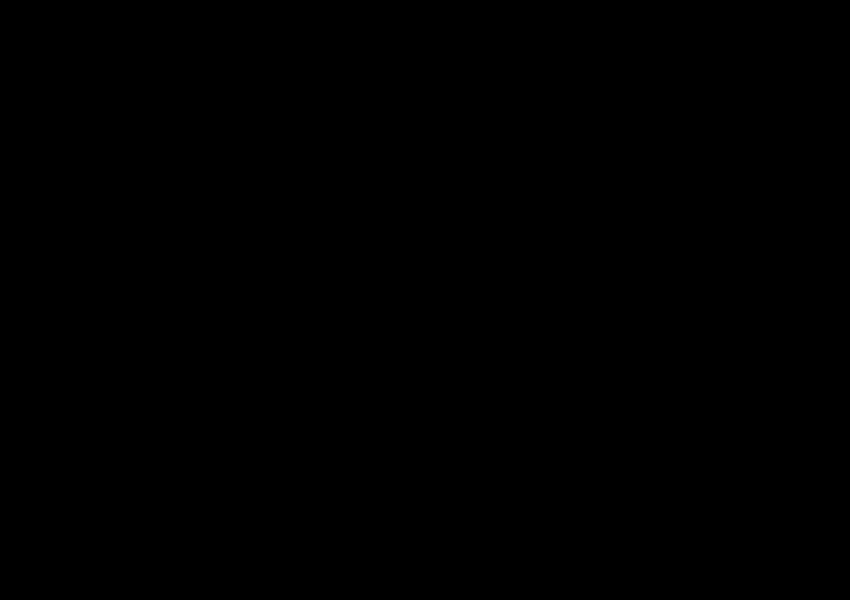

In [173]:
%%time
create_image()

In [174]:
from datashader.bokeh_ext import InteractiveImage
from bokeh.plotting import figure, output_notebook
from bokeh.tile_providers import WMTSTileSource, STAMEN_TONER

output_notebook()

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height,**plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    
    return p

ArcGIS=WMTSTileSource(url='http://server.arcgisonline.com/ArcGIS/rest/services/'
                      'World_Street_Map/MapServer/tile/{Z}/{Y}/{X}.png')

Loading BokehJS ...

In [175]:
p = base_plot()
p.add_tile(ArcGIS)
InteractiveImage(p, create_image)